# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한글 폰트 지원
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

------------------------

# 시각화의 목적에 따른 플롯

- 데이터 분포 파악
- 데이터 관계 파악
- **집단간 비교**
- **시간에 따른 변화**

## 3. 집단 간 비교

: 그룹별 데이터 분포 비교
- FacetGrid를 이용한 범주형 플롯 시각화
    

- 박스플롯(boxplot)
    - seaborn.catplot(kind='box')
    - seaborn.boxplot()

- 막대그래프(barplot)
    - matplotlib.pyplot.bar()
    - matplotlib.pyplot.barh()
    - DataFrame.plot(kind='bar'|'barh')
    - DataFrame.plot.bar()
    - DataFrame.plot.barh()
    - seaborn.barplot()
    - seaborn.catplot(kind='bar')

- 바이올린플롯(violin plot)
    - matplotlib.pyplot.violinplot()
    - seaborn.viloinplot()
    - seaborn.catplot(kind='violin')

- strip plot
    - seaborn.stripplot()
    - seaborn.catplot(kind='strip')

- swarm plot
    - seaborn.swarmplot()
    - seaborn.catplot(kind='swarm')

### 1) 막대 그래프(barplot)

- 범주형 데이터의 범주별 빈도 비교

In [3]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### ① matplotlib.pyplot의 막대그래프 함수

- 형식
    - bar(x, height, width=0.8, bottom=None, align='center', data=None,...)
    - barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

In [4]:
surv_cnt = df.survived.value_counts()
surv_cnt

survived
0    549
1    342
Name: count, dtype: int64

In [5]:
surv_cnt.index=['사망','생존']
surv_cnt

사망    549
생존    342
Name: count, dtype: int64

<BarContainer object of 2 artists>

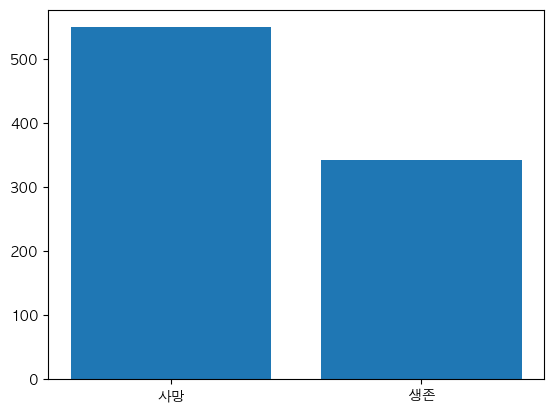

In [6]:
plt.bar(x=surv_cnt.index, height=surv_cnt)

<BarContainer object of 2 artists>

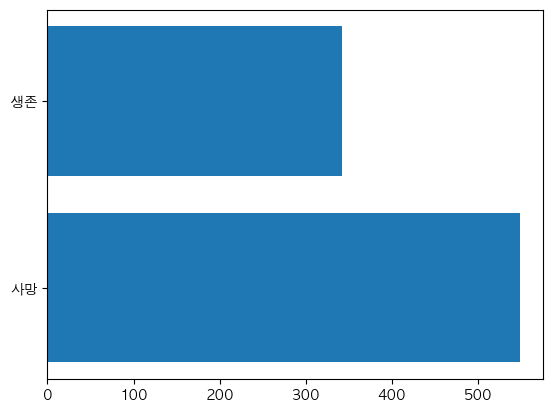

In [7]:
plt.barh(y=surv_cnt.index, width=surv_cnt)

### ② seaborn의 막대그래프 함수

- 형식1
    - barplot(x=None, y=None, hue=None, data=None, order=None, orient='v'|'h', dodge=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
    
    

- 형식2
    - catplot(kind='bar', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.barplot()

<Axes: xlabel='survived'>

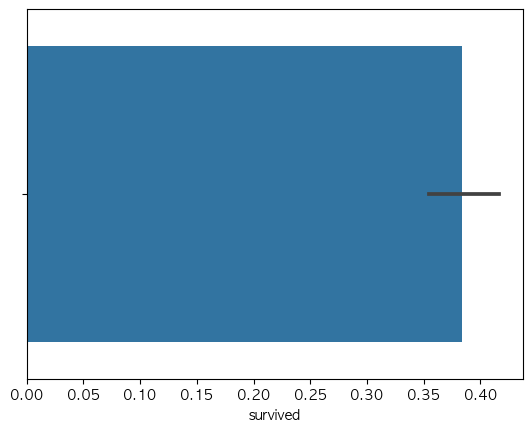

In [8]:
sns.barplot(data=df, x='survived') #0과 1로 표현된 barplot

In [9]:
pd.crosstab(index=df.sex, columns=df.survived, normalize=True, margins=True)

survived,0,1,All
sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


<Axes: xlabel='sex', ylabel='survived'>

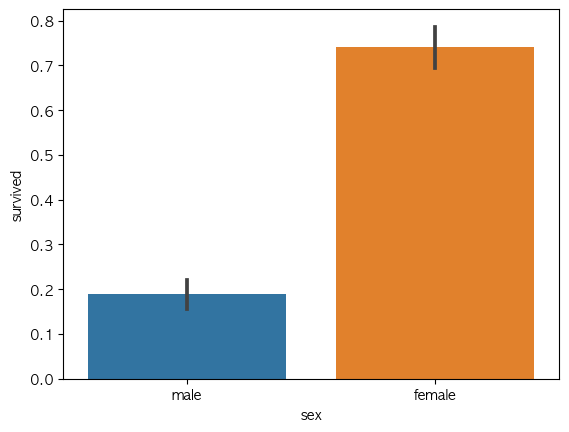

In [10]:
sns.barplot(data=df, x='sex', y='survived')

<Axes: xlabel='sex', ylabel='survived'>

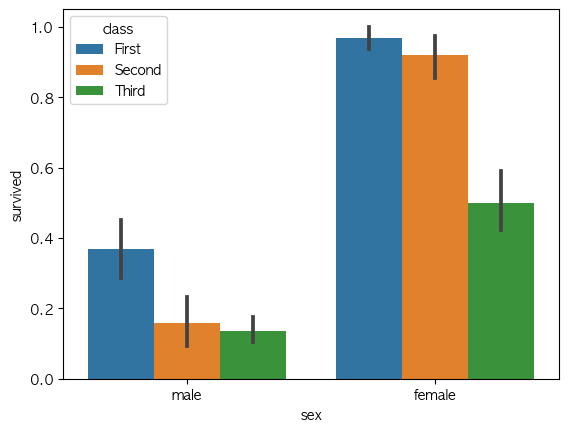

In [11]:
sns.barplot(data=df, x='sex', y='survived', hue='class')

<Axes: xlabel='class', ylabel='survived'>

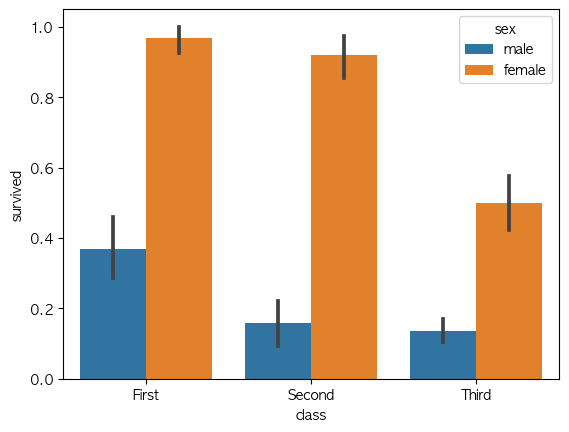

In [12]:
sns.barplot(data=df, x='class', y='survived', hue='sex')

<Axes: xlabel='sex', ylabel='survived'>

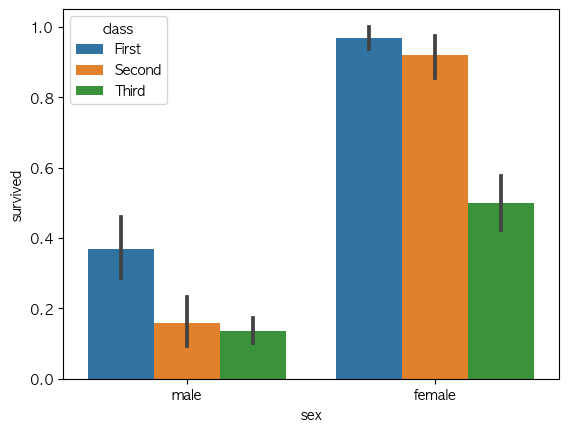

In [13]:
sns.barplot(data=df, x='sex', y='survived', hue='class', dodge=True)

- 누적막대그래프(stacked bar chart)

<Axes: xlabel='sex', ylabel='survived'>

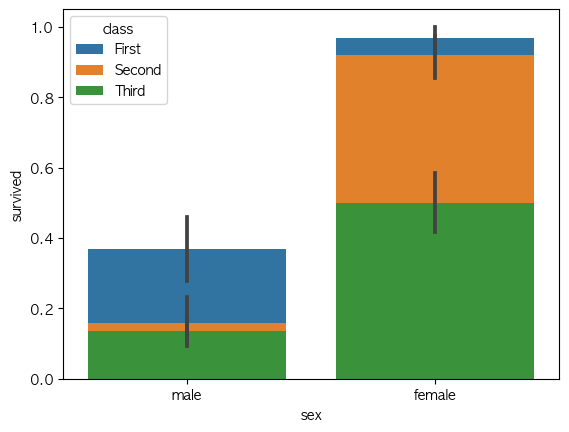

In [14]:
sns.barplot(data=df, x='sex', y='survived', hue='class', dodge=False)

### sns.catplot(kind='bar')

In [15]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [16]:
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

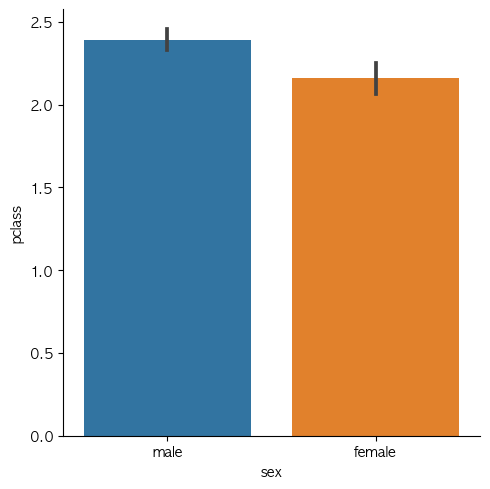

In [17]:
sns.catplot(kind='bar', data=df, x='sex', y='pclass')

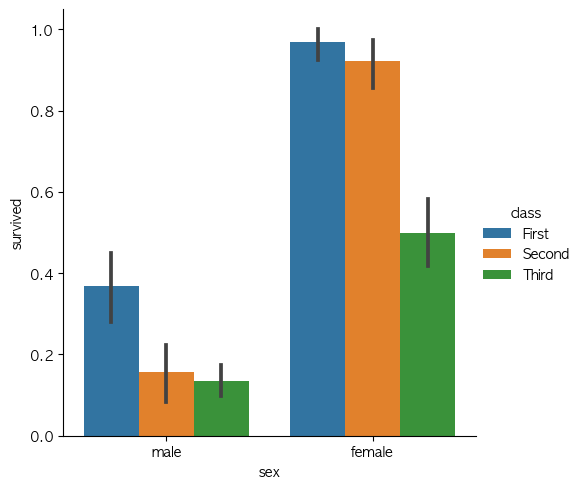

In [18]:
sns.catplot(kind='bar', data=df, x='sex', hue='class', y='survived')

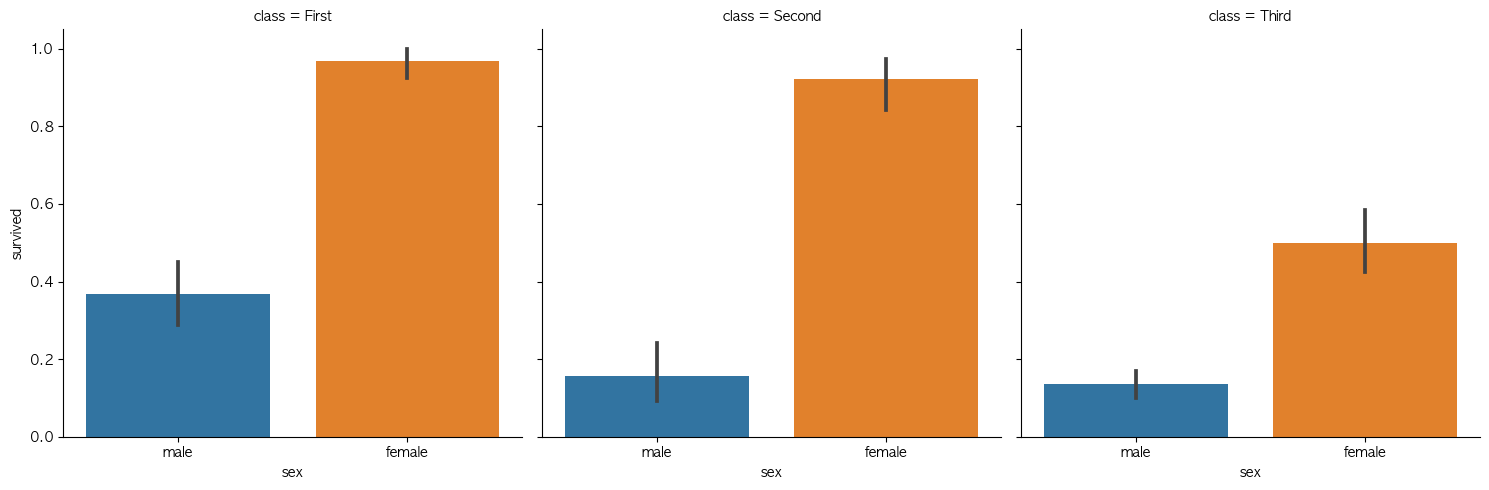

In [19]:
sns.catplot(kind='bar', data=df, x='sex', y='survived', col='class')

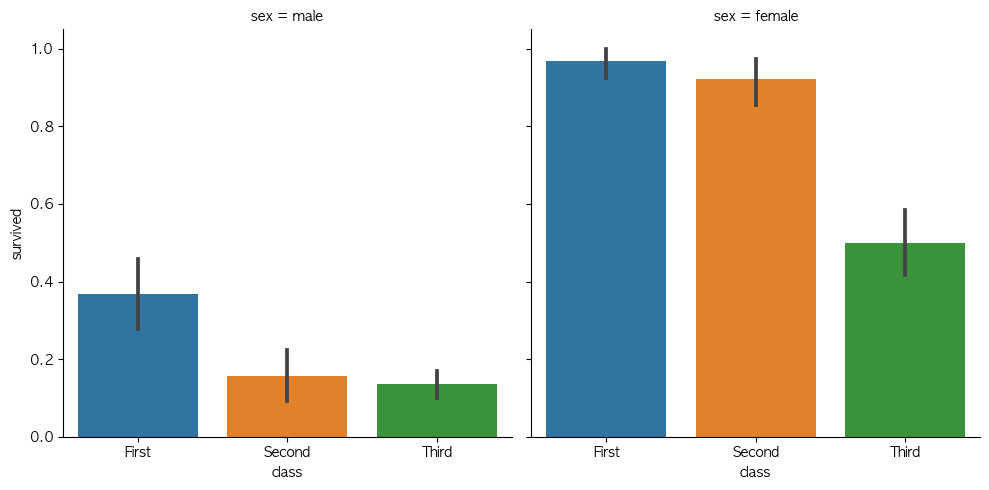

In [20]:
sns.catplot(kind='bar', data=df, x='class', y='survived', col='sex')

#### catplot()의 col인수
- 윈도우에 범주별 막대그래프를 따로 표현

In [21]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [22]:
ex1 = tips.groupby('day')['total_bill'].mean()
ex1

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [23]:
ex1 = ex1.reset_index()
ex1

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


<Axes: xlabel='day', ylabel='total_bill'>

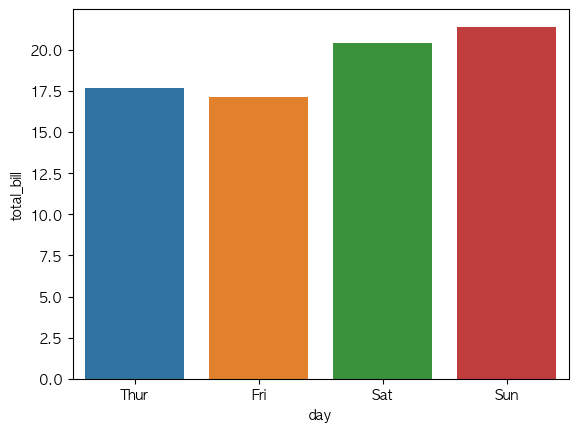

In [24]:
sns.barplot(data=ex1, x='day', y='total_bill')

In [25]:
ex2 = pd.DataFrame({'Cate':['A','B','A','A','B','A','B','A'], 
                   'value':[10,13,12,8,9,5,10,20]})
ex2

,Cate,value
0,A,10
1,B,13
2,A,12
3,A,8
4,B,9
5,A,5
6,B,10
7,A,20


<Axes: xlabel='Cate', ylabel='value'>

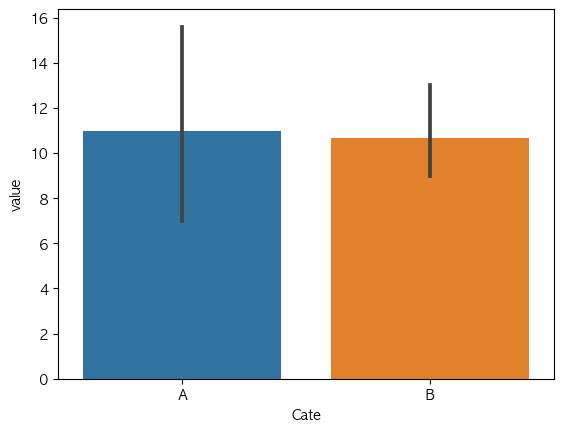

In [26]:
sns.barplot(data=ex2, x='Cate', y='value')

In [27]:
ex2[ex2.Cate == 'A'].value.mean()

11.0

In [28]:
ex2[ex2.Cate == 'B'].value.mean()

10.666666666666666

In [29]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [30]:
pd.pivot_table(data=df, index='sex', values='survived') 

,survived
sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, '성별에 따른 평균생존율')

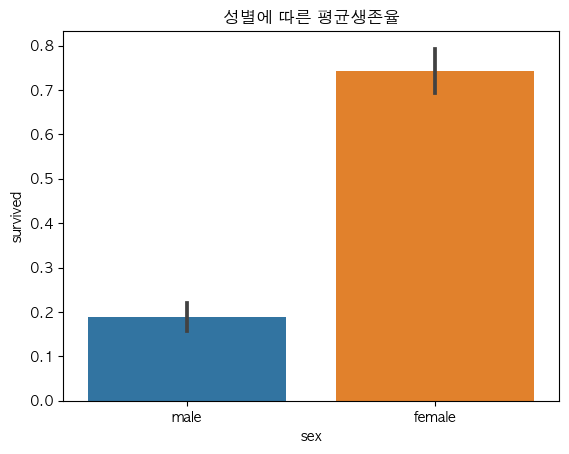

In [31]:
sns.barplot(data=df, x='sex', y='survived')
plt.title('성별에 따른 평균생존율')

### 2) 바이올린 플롯

- 박스플롯의 기능과 함께 데이터의 커널밀도곡선을 제시
- 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
- 더 실제에 가까운 분포를 알 수 있음

#### 예제 데이터. iris dataset

In [32]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### ① matplotlib.pyplot의 바이올린 플롯 함수

- 형식
    - violinplot(dataset, positions=None, vert=True, widths=0.5,  *, data=None)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

{'bodies': [<matplotlib.collections.PolyCollection at 0x173f0cdd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1742413d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x174297890>,
 'cbars': <matplotlib.collections.LineCollection at 0x1742a4b50>}

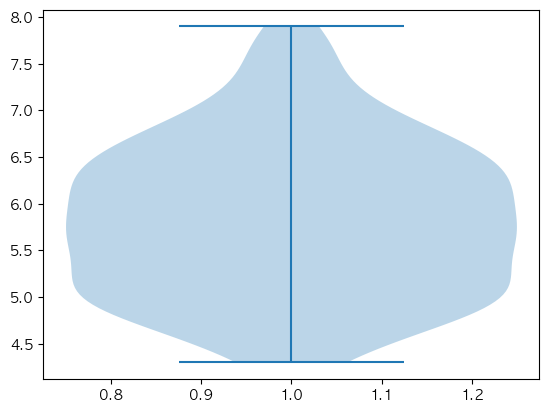

In [33]:
plt.violinplot(iris.sepal_length)

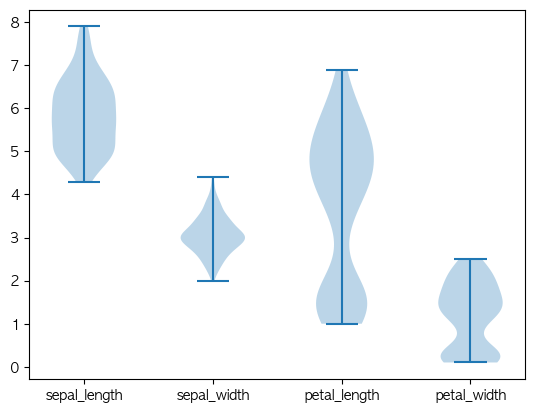

In [34]:
plt.violinplot(iris.iloc[:, :-1]) #vert=True
plt.xticks([1,2,3,4],['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

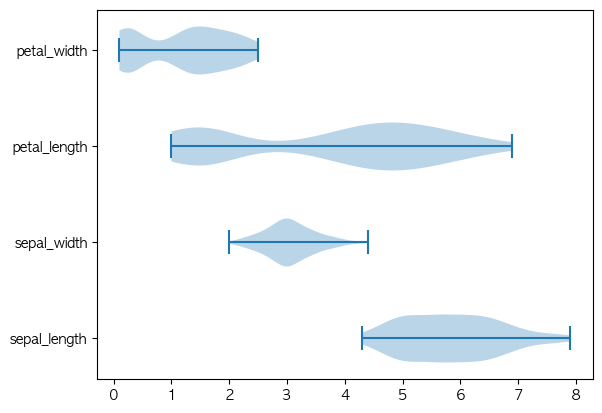

In [35]:
plt.violinplot(iris.iloc[:, :-1], vert=False)
plt.yticks([1,2,3,4],['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

### ② seaborn의 바이올린 플롯 함수

- 형식1
    - violinplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
    
    
- 형식2
    - catplot(kind='violin', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.violinplot()

<Axes: xlabel='sepal_length'>

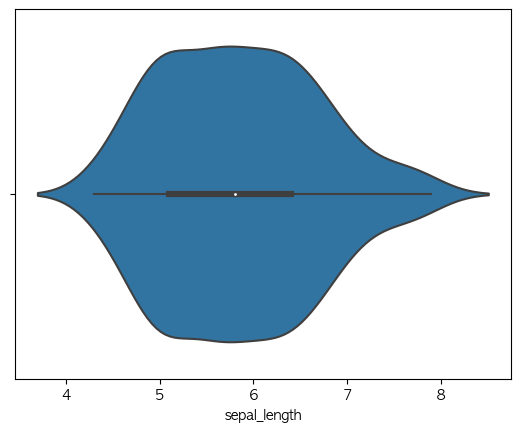

In [36]:
#안에 boxplot을 포함하고 있음
sns.violinplot(data=iris, x='sepal_length')

<Axes: xlabel='petal_length'>

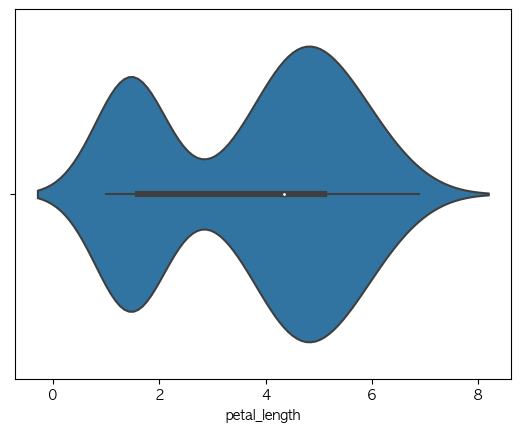

In [37]:
sns.violinplot(data=iris, x='petal_length')

<Axes: >

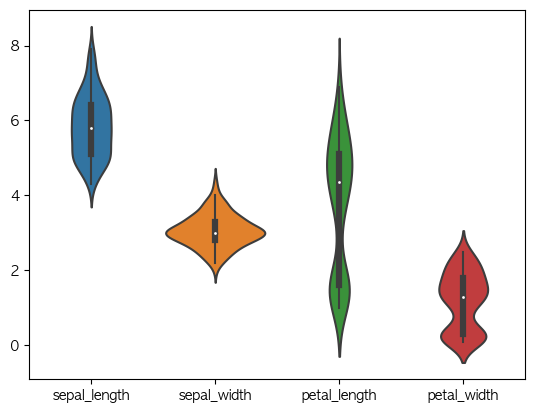

In [38]:
sns.violinplot(data=iris)

<Axes: >

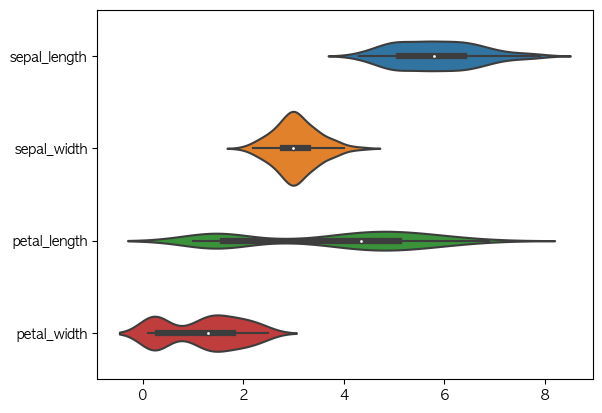

In [39]:
sns.violinplot(data=iris, orient='h')

<Axes: >

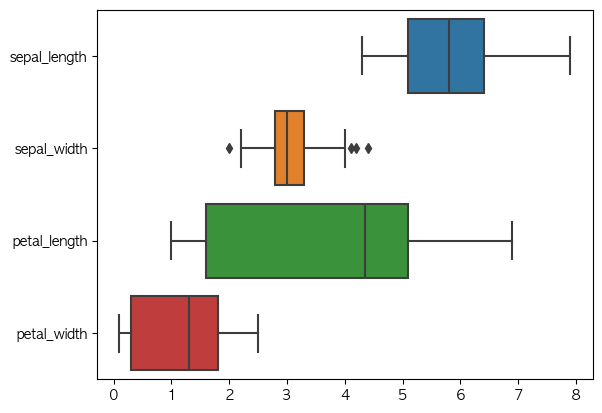

In [40]:
sns.boxplot(data=iris, orient='h')

<Axes: xlabel='species', ylabel='petal_length'>

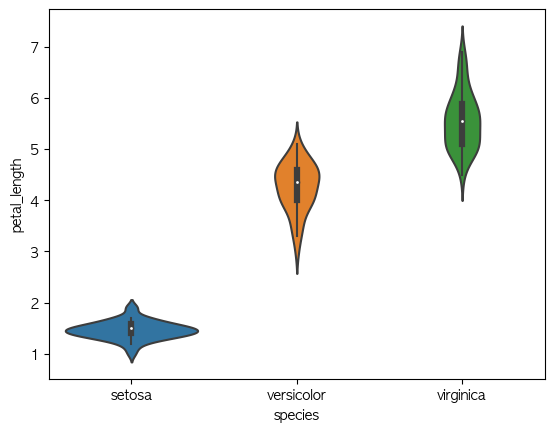

In [41]:
sns.violinplot(data=iris, x='species', y='petal_length')

<Axes: xlabel='petal_length', ylabel='species'>

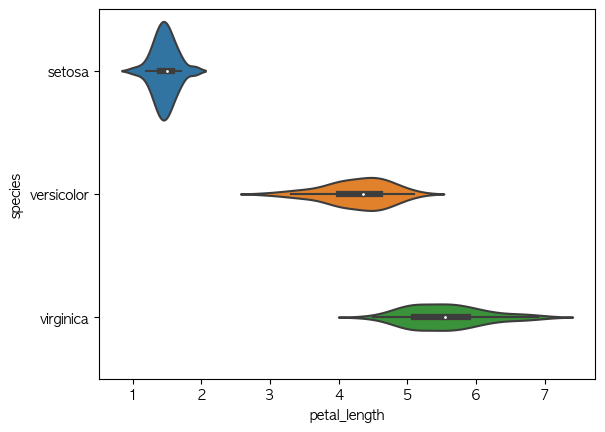

In [42]:
sns.violinplot(data=iris, y='species', x='petal_length')

### sns.catplot(kind='violin')

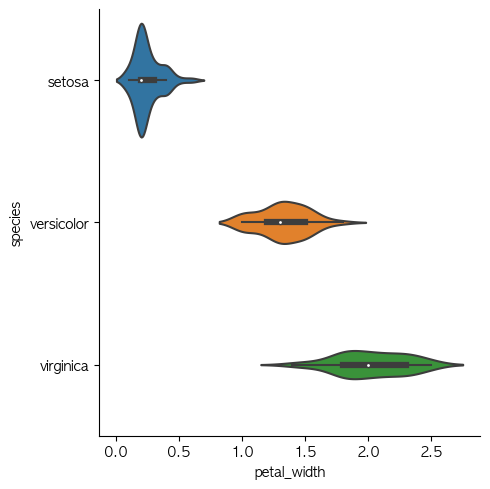

In [43]:
sns.catplot(kind='violin', data=iris, x='petal_width', y='species')

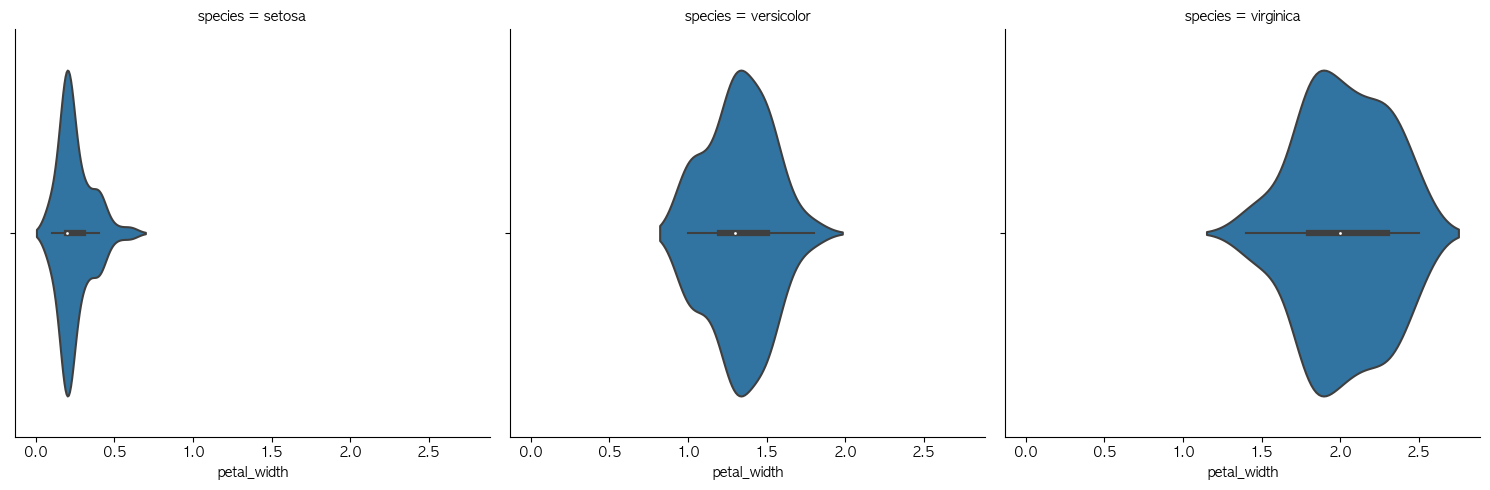

In [44]:
sns.catplot(kind='violin', data=iris, x='petal_width', col='species')

### 3) Strip plot

- 겹치는 데이터를 파악할 수 있도록 같은 값에 jitter를 통해 겹치지 않게 그려주는 그래프

### seaborn의 strip plot 함수

- 형식1
    - stripplot(x=None, y=None, hue=None, data=None, order=None, jitter=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot
    
    
- 형식2
    - catplot(kind='strip', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.stripplot()

In [45]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<Axes: xlabel='sepal_length'>

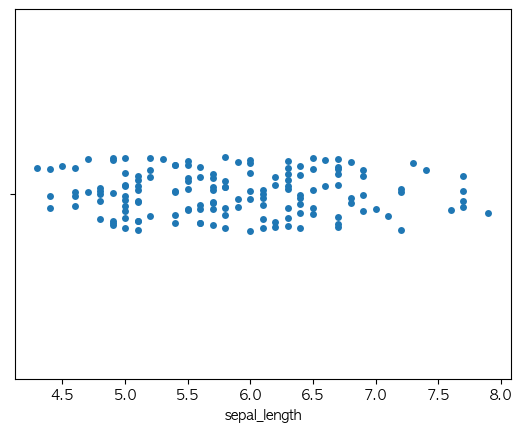

In [46]:
sns.stripplot(data=iris, x='sepal_length')

In [47]:
iris.sepal_length.value_counts().sort_index()

sepal_length
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
Name: count, dtype: int64

<Axes: xlabel='sepal_length'>

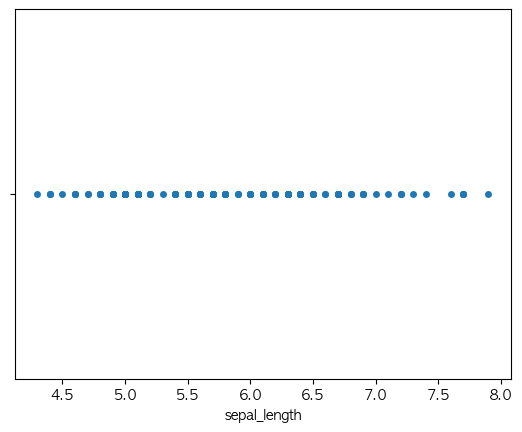

In [48]:
#jitter한 점으로 출력 - 데이터가 중복되는게 어디 있는지 확인
sns.stripplot(data=iris, x='sepal_length', jitter=False)

<Axes: xlabel='petal_length'>

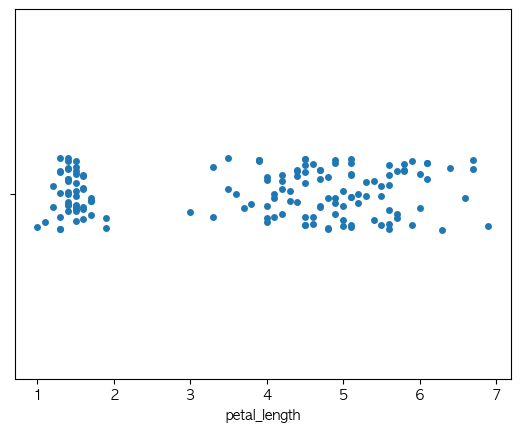

In [49]:
sns.stripplot(data=iris, x='petal_length')

<Axes: xlabel='species', ylabel='petal_length'>

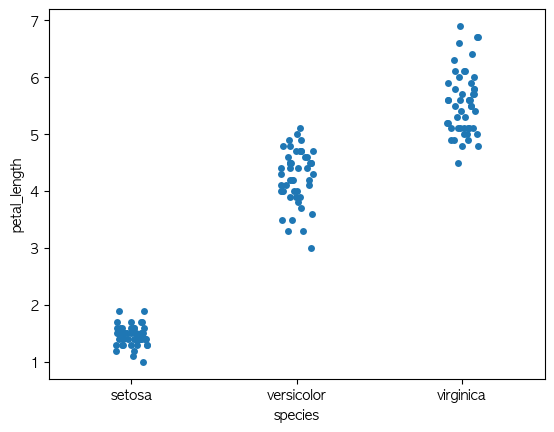

In [50]:
sns.stripplot(data=iris, x='species', y='petal_length')

<Axes: xlabel='petal_length', ylabel='species'>

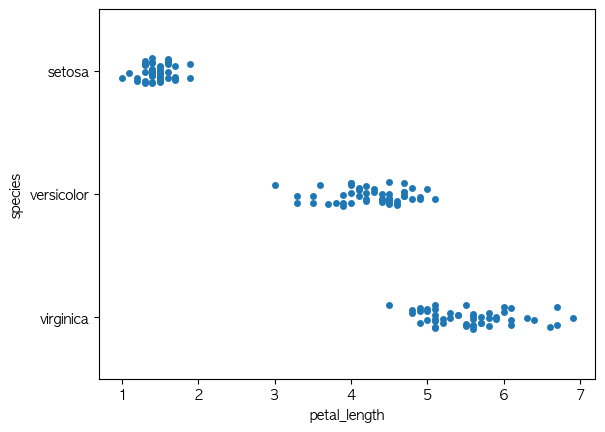

In [51]:
sns.stripplot(data=iris, y='species', x='petal_length')

### sns.catplot(kind='strip')

### 4) Swarm plot

- 데이터의 분산까지 고려하여 겹치는 데이터를 겹치지 않게 그려주는 그래프
- 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

### seaborn의 swarm plot 함수

- 형식1
    - swarmplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
    
    

- 형식2
    - catplot(kind='swarm', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

<Axes: xlabel='sepal_length'>

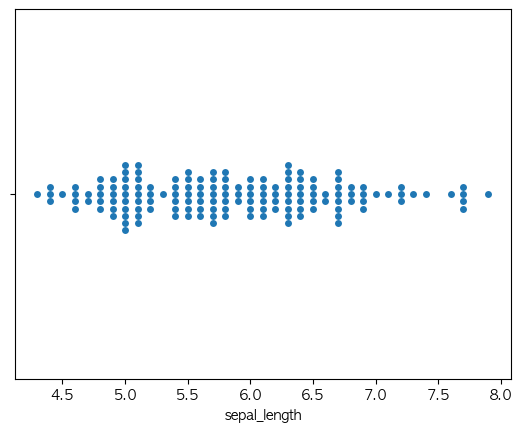

In [52]:
sns.swarmplot(data=iris, x='sepal_length')

<Axes: xlabel='petal_length', ylabel='species'>

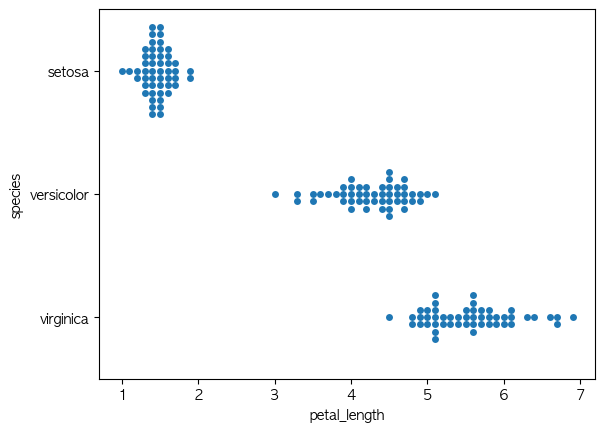

In [53]:
sns.swarmplot(data=iris, x='petal_length', y='species')

In [54]:
pd.pivot_table(data=iris, index='species', values='petal_length', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
species,,,,,,,,
setosa,1.4,1.50,1.575,50.0,1.9,1.462,1.0,0.173664
versicolor,4.0,4.35,4.600,50.0,5.1,4.260,3.0,0.469911
virginica,5.1,5.55,5.875,50.0,6.9,5.552,4.5,0.551895


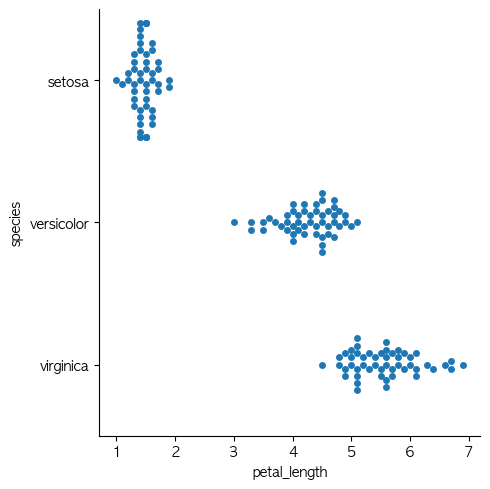

In [55]:
sns.catplot(kind='swarm', data=iris, x='petal_length', y='species')

#### box plot과 swarmplot을 같이 표시

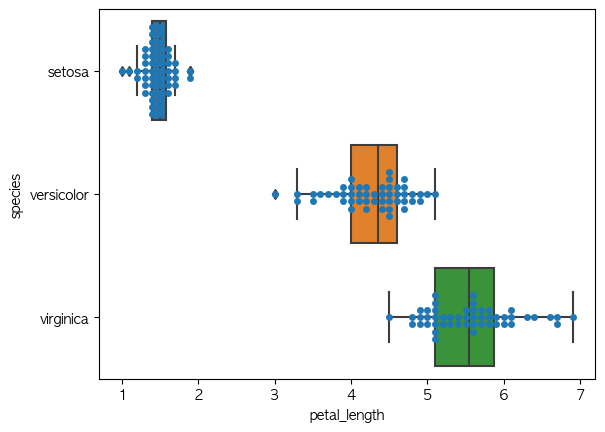

In [56]:
sns.boxplot(data=iris, x='petal_length', y='species')
sns.swarmplot(data=iris, x='petal_length', y='species')
plt.show()

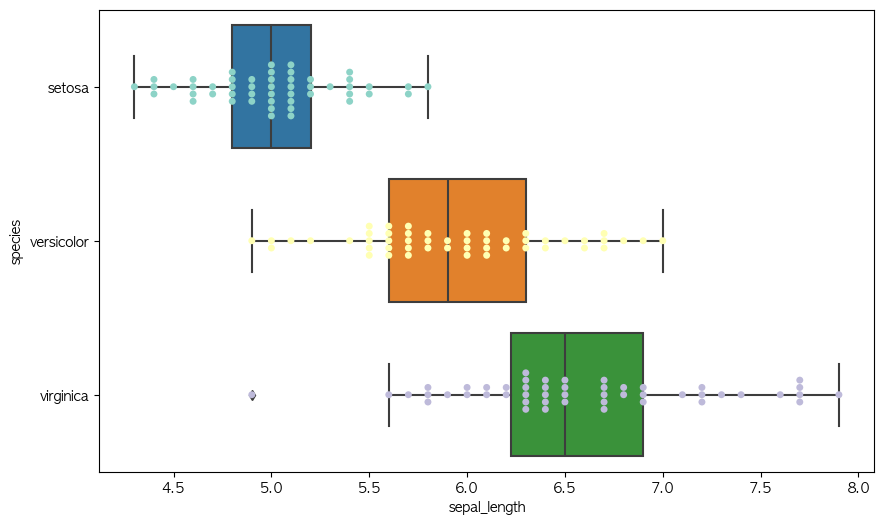

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=iris, x='sepal_length', y='species')
sns.swarmplot(data=iris, x='sepal_length', y='species', palette='Set3')
plt.show()

------

## 4. 시간에 따라 변화하는 데이터 표현

- 시계열 데이터 시각화
- 시간에 따른 추세 파악
- 선그래프(line plot)
    - matplotlib.pyplot.plot()
    - seaborn.lineplot()
    - seaborn.relplot(kind='line')
    - DataFrame.plot(kind='line')
    - DataFrame.plot.line()

### 예제 데이터. 미세먼지

In [58]:
dust = pd.read_excel('data/fine_dust.xlsx', index_col='area')
dust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Seoul to Jeju
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    14 non-null     float64
 1   2002    14 non-null     float64
 2   2003    14 non-null     float64
 3   2004    14 non-null     float64
 4   2005    14 non-null     float64
 5   2006    14 non-null     int64  
 6   2007    14 non-null     int64  
 7   2008    14 non-null     float64
 8   2009    14 non-null     float64
 9   2010    14 non-null     float64
 10  2011    14 non-null     int64  
 11  2012    14 non-null     float64
 12  2013    14 non-null     float64
 13  2014    14 non-null     float64
 14  2015    14 non-null     float64
 15  2016    14 non-null     float64
 16  2017    14 non-null     float64
 17  2018    14 non-null     float64
 18  2019    14 non-null     float64
dtypes: float64(16), int64(3)
memory usage: 2.2+ KB


In [59]:
dust.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0
Busan,60.0,69.0,55.0,60.0,58.0,59,57,51.0,49.0,49.0,47,43.0,49.0,48.0,46.0,44.0,44.0,41.0,36.0
Daegu,67.0,71.0,59.0,0.0,55.0,54,53,57.0,48.0,51.0,47,42.0,45.0,45.0,46.0,43.0,42.0,39.0,39.0


### ① matplotlib의 plot()을 이용하여 라인플롯 그리기

- 형식 : plot(x, y, fmt, ..., data=None, scalex=True, scaley=True, **kwargs)
    - x, y : array-like or scalar
    - fmt : str, optional

In [60]:
#2001~2009년의 서울 미세먼지 변화
seoul = dust.loc['Seoul', 2001:2009]
seoul

2001    71.0
2002    76.0
2003    69.0
2004    61.0
2005    58.0
2006    60.0
2007    61.0
2008    55.0
2009    54.0
Name: Seoul, dtype: float64

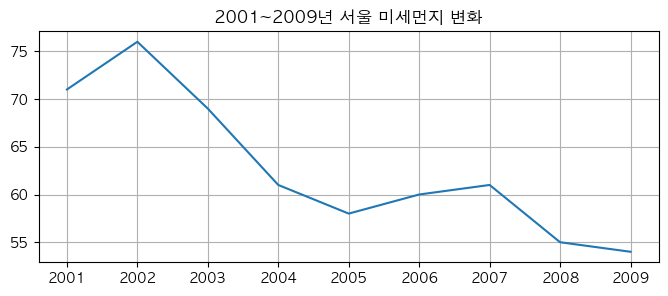

In [61]:
seoul = dust.loc['Seoul', 2001:2009]
plt.figure(figsize=(8,3))
plt.plot(seoul)
plt.grid()
plt.title('2001~2009년 서울 미세먼지 변화')
plt.show()

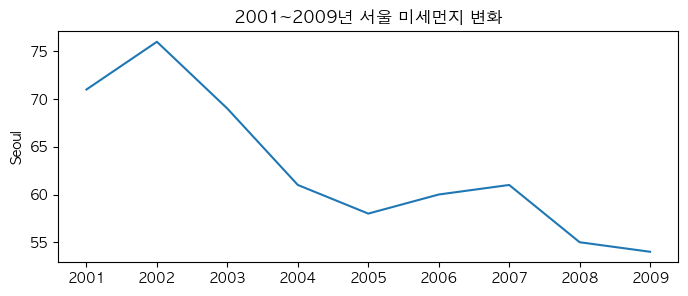

In [62]:
seoul = dust.loc['Seoul', 2001:2009]
plt.figure(figsize=(8,3))
sns.lineplot(seoul)
plt.title('2001~2009년 서울 미세먼지 변화')
plt.show()

#### plot()의 data 인수
- indexable object : If given, provide the label names to plot in x and y.

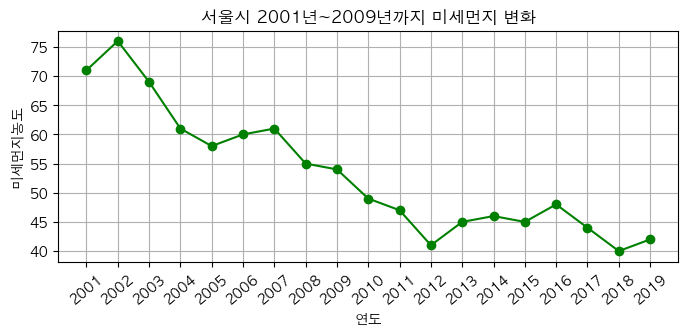

In [63]:
dustT = dust.T 
plt.figure(figsize=(8,3))
plt.plot(dustT.index, 'Seoul', 'g-o', data=dustT)
plt.xticks(range(2001,2020), rotation=40)
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.grid()
plt.title('서울시 2001년~2009년까지 미세먼지 변화')
plt.show()

### ② seaborn의 선그래프 함수 이용

- 형식1.
    - lineplot(* , x=None, y=None, hue=None, size=None, style=None, data=None, palette=None,...)
    - https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
    
    

- 형식2.
    - relplot(kind='line', x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

### sns.lineplot()

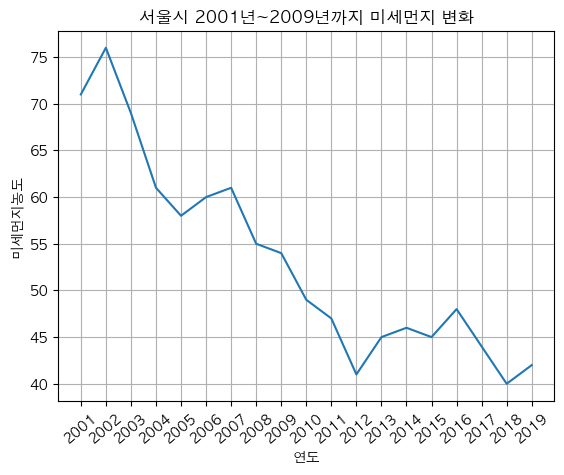

In [64]:
sns.lineplot(data=dustT, x=dustT.index, y='Seoul')
plt.xticks(range(2001,2020), rotation=40)
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.grid()
plt.title('서울시 2001년~2009년까지 미세먼지 변화')
plt.show()

In [65]:
dust2=dust.loc[:, 2016:2019]
dust2

,2016,2017,2018,2019
area,,,,
Seoul,48.0,44.0,40.0,42.0
Gyeonggi,53.0,51.0,44.0,46.0
Incheon,49.0,46.0,40.0,43.0
Busan,44.0,44.0,41.0,36.0
Daegu,43.0,42.0,39.0,39.0
Gwangju,40.0,40.0,41.0,42.0
Daejeon,44.0,45.0,44.0,42.0
Ulsan,43.0,43.0,40.0,37.0
Sejong,46.0,47.0,40.0,44.0


<Axes: xlabel='area'>

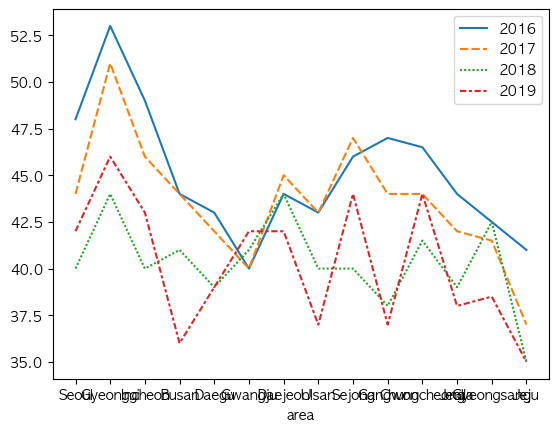

In [66]:
sns.lineplot(data=dust2)

<Axes: >

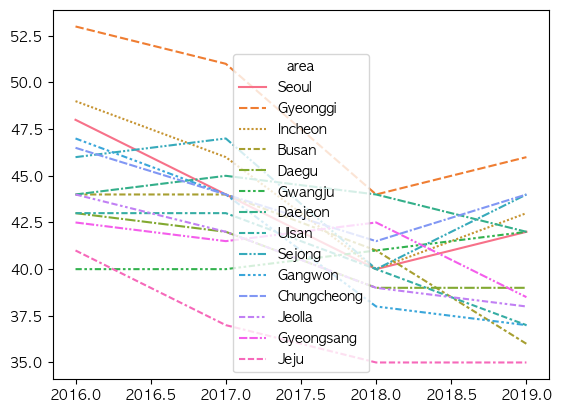

In [67]:
sns.lineplot(data=dust2.T)

<Axes: xlabel='area'>

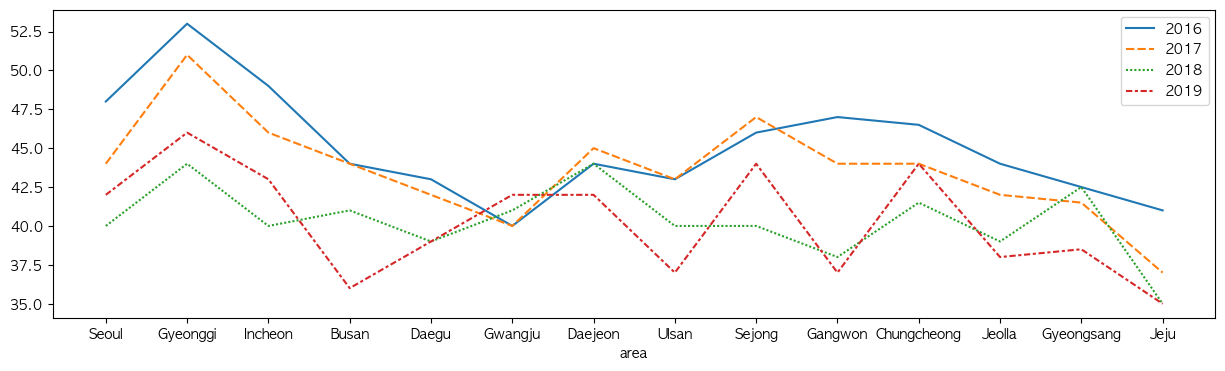

In [68]:
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)

#### seaborn의 set_style() 이용하여 라인플롯 그리기

Text(0.5, 1.0, '2016~2019 미세먼지 변화')

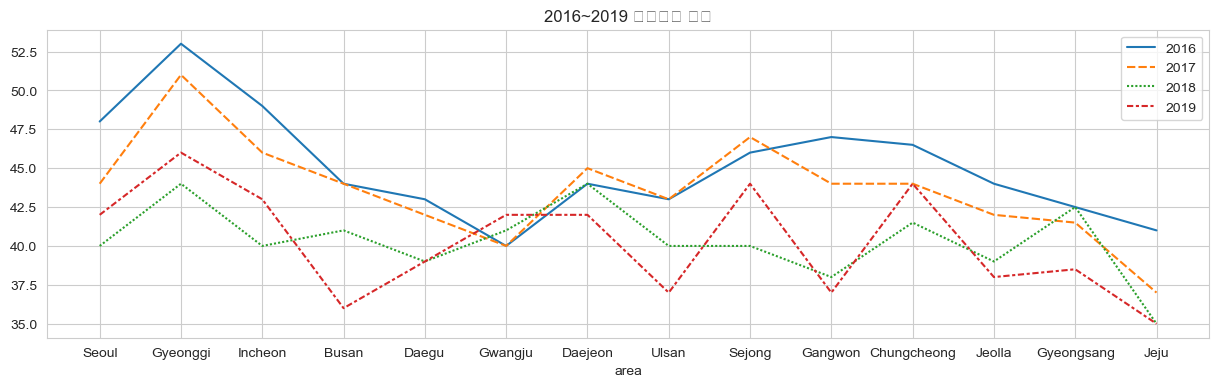

In [69]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)
plt.title('2016~2019 미세먼지 변화') #한글로 주면 깨짐

Text(0.5, 1.0, '2016~2019 미세먼지 변화')

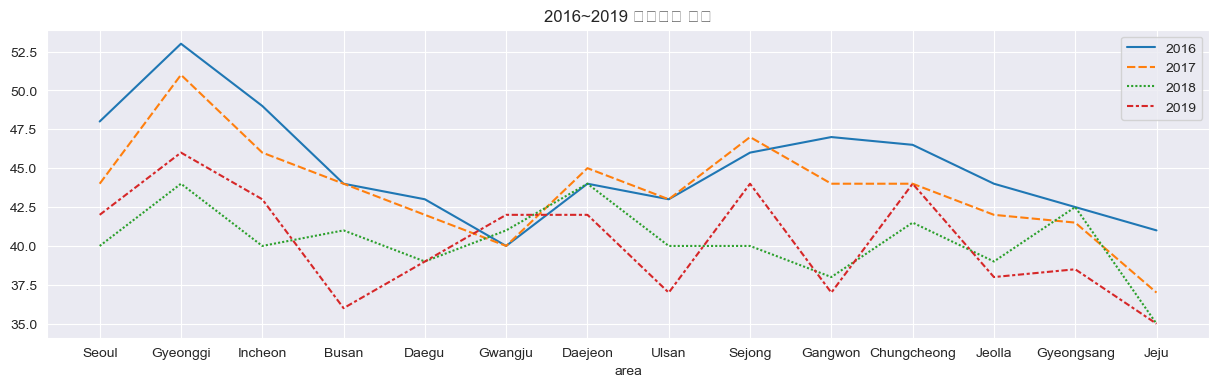

In [70]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)
plt.title('2016~2019 미세먼지 변화') #한글로 주면 깨짐

**sns.despine() 함수를 이용한 그림 테두리 제거**

: sns.despine(right=True,left=True,top=False,bottom=False)

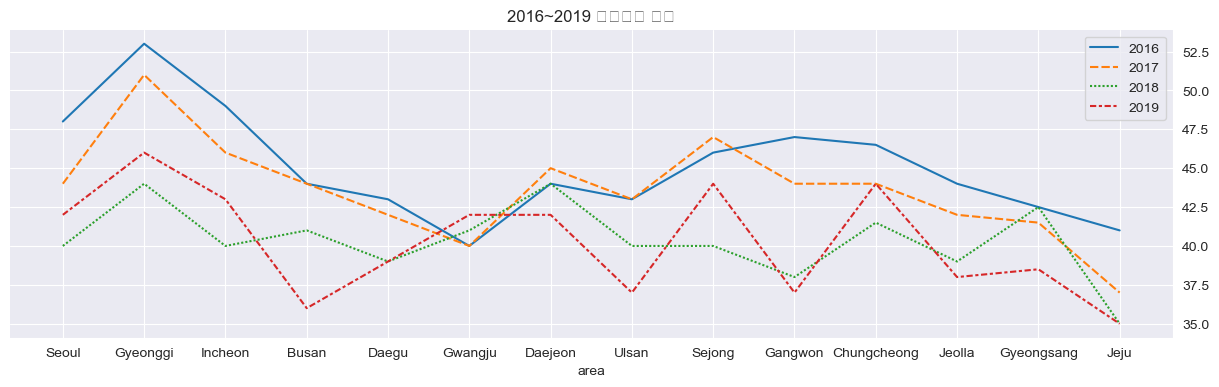

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)
plt.title('2016~2019 미세먼지 변화')
sns.despine(right=False, left=True) #y축이 오른쪽으로 바뀜

### ③ pandas.DataFrame.plot(kind='line') 이용

<Axes: xlabel='area'>

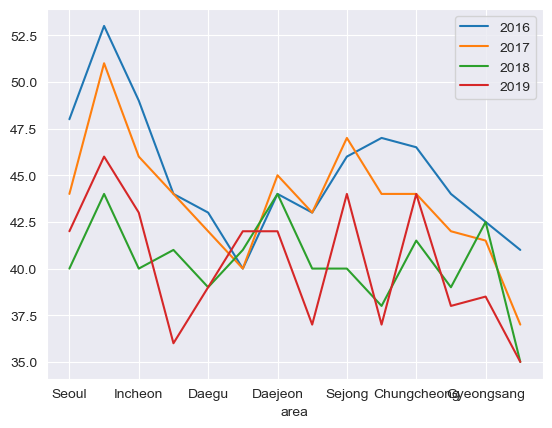

In [72]:
dust2.plot()

<Axes: xlabel='area'>

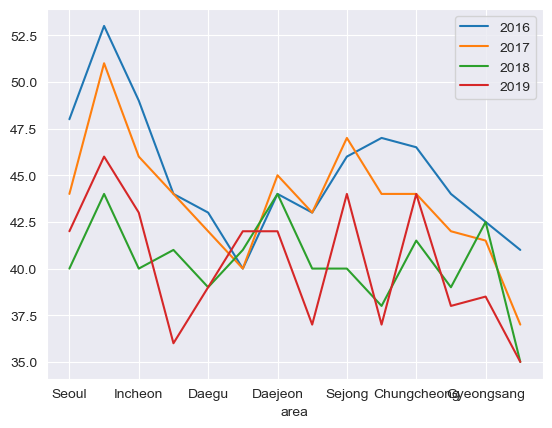

In [73]:
dust2.plot.line()

------------------------------------------------

## 5. 히트맵(heatmap)

### (1) seaborn의 heatmap() 함수 사용

- 범주형-범주형-수치형 자료의 시각화
    - X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료의 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화


- 형식 : heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)


- https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

### 예제 데이터
- 캐글 자전거수요예측 데이터
- https://www.kaggle.com/competitions/bike-sharing-demand

In [74]:
bike=pd.read_csv('./data/bike.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [75]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- datetime : hourly date + timestamp (날짜와 시간)

- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)

- holiday : whether the day is considered a holiday (휴일)

- workingday ; whether the day is neither a weekend nor holiday (평일)

- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)

- temp : temperature in Celsius (온도)

- atemp : “feels like” temperature in Celsius (체감 온도)

- humidity : relative humidity (상대 습도)

- windspeed : wind speed (풍속)

- casual : number of non-registered user rentals initiated (비회원 대여량)

- registered : number of registered user rentals initiated (회원 대여량)

- count : number of total rentals (총 대여량)

In [76]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.datetime.dtype #M8ns = datetime

dtype('<M8[ns]')

In [77]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [78]:
bike.datetime[:10]

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
5   2011-01-01 05:00:00
6   2011-01-01 06:00:00
7   2011-01-01 07:00:00
8   2011-01-01 08:00:00
9   2011-01-01 09:00:00
Name: datetime, dtype: datetime64[ns]

In [79]:
bike['hour'] = bike.datetime.dt.hour
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [80]:
bike['month'] = bike.datetime.dt.month
bike['day'] = bike.datetime.dt.day
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1


In [81]:
bike.day.value_counts().sort_index()

day
1     575
2     573
3     573
4     574
5     575
6     572
7     574
8     574
9     575
10    572
11    568
12    573
13    574
14    574
15    574
16    574
17    575
18    563
19    574
Name: count, dtype: int64

In [82]:
bike.month.value_counts().sort_index()

month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: count, dtype: int64

In [83]:
bike['hours'] = pd.cut(bike.hour, [-0.1, 2, 5, 8, 11, 14, 17, 20, 23],
      labels=['0~2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~23'])
bike.hours.value_counts().sort_index()

hours
0~2      1357
3~5      1327
6~8      1365
9~11     1365
12~14    1368
15~17    1368
18~20    1368
21~23    1368
Name: count, dtype: int64

#### sns.heatmap() 사용하여 계절(season)과 시간대별(hours) 자전거  총대여량 시각화

#### 데이터 피봇팅

- pivot() 함수
    - 형식1. pd.pivot(data, index=None, columns=None, values=None)
    - 형식2. 데이터프레임.pivot(index=None, columns=None, values=None)
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
    
    
- pivot_table() 함수
    - 형식1. pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) 
    - 형식2. 데이터프레임.pivot_table( )
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [98]:
season_hour = bike.pivot_table(index='season', columns='hours', 
                               values='count', aggfunc='sum')
season_hour

hours,0~2,3~5,6~8,9~11,12~14,15~17,18~20,21~23
season,,,,,,,,
1,6730,2215,47517,42851,53175,71955,63711,24344
2,13406,4384,80420,76620,96669,135077,129817,51889
3,17276,5638,87133,82778,102348,140410,143687,61392
4,13307,4621,81656,74185,93337,126541,107228,43159


- heatmap()의 색상 스케일 최소값(vmin), 최대값(vmax) 인수 사용

<Axes: xlabel='hours', ylabel='season'>

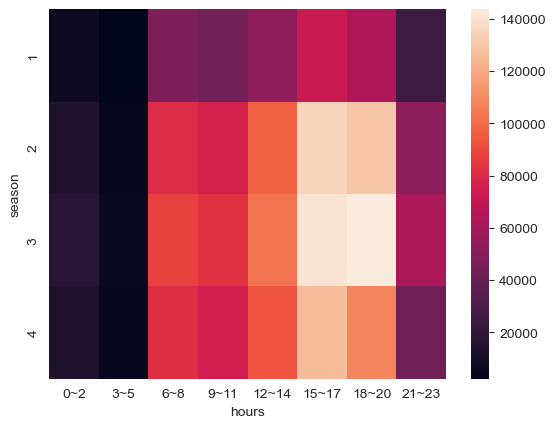

In [85]:
sns.heatmap(season_hour)

In [86]:
season_hour.max().max()

143687

<Axes: xlabel='hours', ylabel='season'>

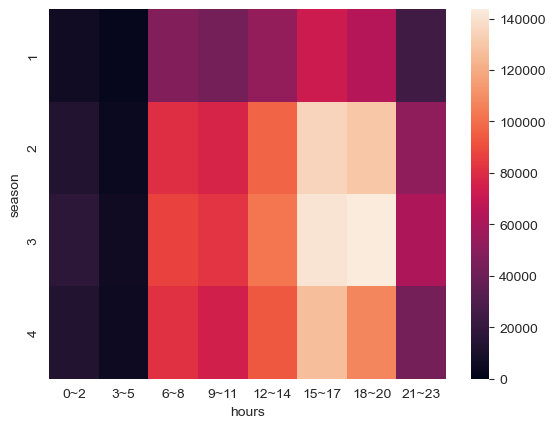

In [87]:
sns.heatmap(season_hour, vmin=0, vmax=season_hour.max().max())

#### heatmap()의 annot, fmt 인수
- annot=True : 히트맵의 각 셀에 값 표시
- fmt='d' or 'f' : 히트맵에 표시하는 값의 서식(format) 지정 (정수, 실수)

In [88]:
season_hour_mean = pd.pivot_table(data=bike, index='season', columns='hours',
              values='count', aggfunc='mean')
season_hour_mean

hours,0~2,3~5,6~8,9~11,12~14,15~17,18~20,21~23
season,,,,,,,,
1,20.210210,7.214984,140.168142,126.404130,155.482456,210.394737,186.289474,71.181287
2,39.198830,12.932153,235.146199,224.035088,282.657895,394.961988,379.581871,151.722222
3,50.811765,16.533724,254.774854,242.040936,299.263158,410.555556,420.137427,179.508772
4,38.909357,13.591176,238.760234,216.915205,272.915205,370.002924,313.532164,126.195906


<Axes: xlabel='hours', ylabel='season'>

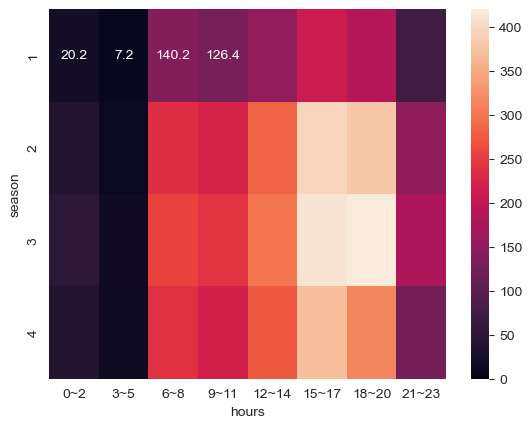

In [89]:
sns.heatmap(season_hour_mean, vmin=0, vmax=season_hour_mean.max().max(),
           annot=True, fmt='.1f')

#### sns.heatmap()함수의 cmap인수 사용하여 다른 color map 지정

- color maps in Matplotlib 링크 참고: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

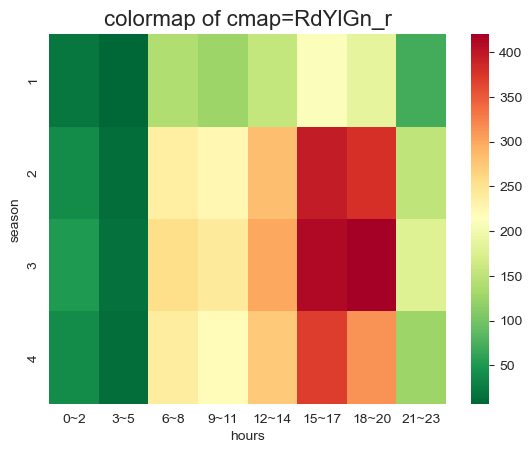

In [90]:
sns.heatmap(season_hour_mean, cmap='RdYlGn_r')
plt.title('colormap of cmap=RdYlGn_r', fontsize=16)
plt.show()

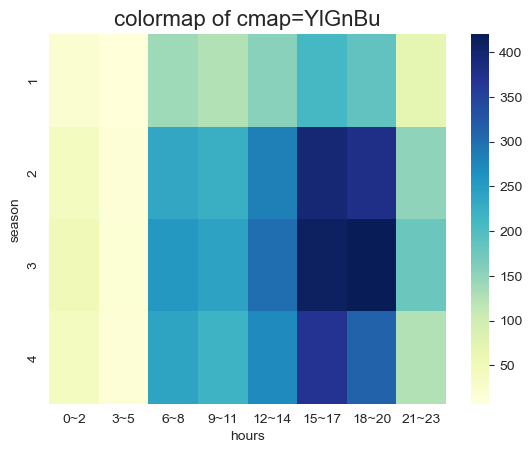

In [91]:
sns.heatmap(season_hour_mean, cmap='YlGnBu')
plt.title('colormap of cmap=YlGnBu', fontsize=16)
plt.show()

### (2) matplotlib의 pcolor()를 이용한 heatmap 그리기

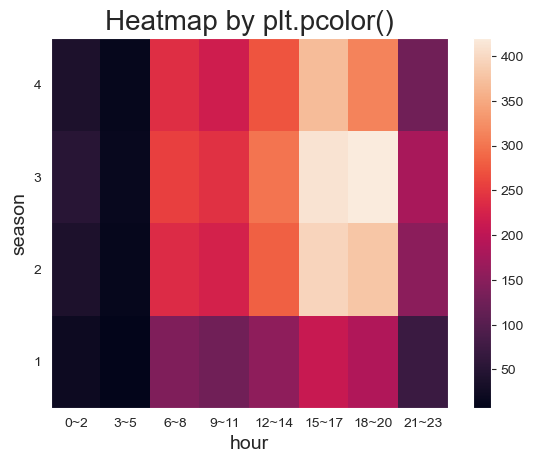

In [92]:
index_n = len(season_hour_mean.index)
col_n = len(season_hour_mean.columns)

plt.pcolor(season_hour_mean)
plt.xticks(np.arange(0.5, col_n, 1), season_hour_mean.columns)
plt.yticks(np.arange(0.5, index_n, 1), season_hour_mean.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('hour', fontsize=14)
plt.ylabel('season', fontsize=14)
plt.colorbar()
plt.show()

------------------------------------------

### 예제 데이터

- seaborn 패키지의 flights dataset

In [93]:
flights =  sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [94]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


**heatmap을 그리기 위한 데이터 테이블 생성**
- pivot 테이블을 이용해서 연도별 각 월 승객수로 구조를 변환

In [95]:
f_pivot = flights.pivot(index='month', columns='year', values='passengers')
f_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


**seaborn.heatmap() 그리기**

<Axes: xlabel='year', ylabel='month'>

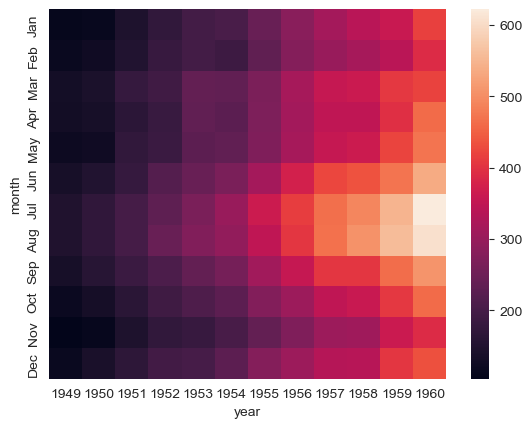

In [96]:
sns.heatmap(f_pivot)

<Axes: xlabel='year', ylabel='month'>

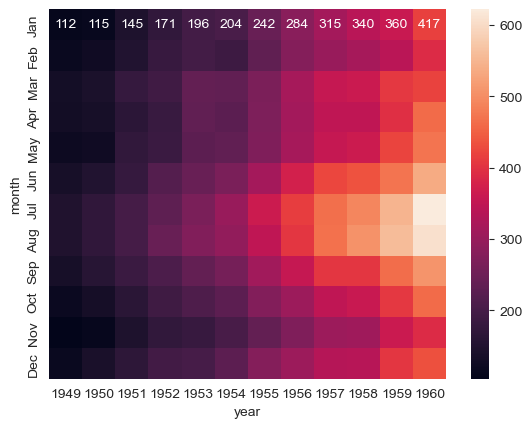

In [97]:
sns.heatmap(f_pivot, annot=True, fmt='d')

----------------------------------------------------